In [1]:
# Import my own classes
import Prot_Post as Post
import OCTP_postprocess_CLASS as octp

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import scipy.optimize as opt
import numpy as np

from tabulate import tabulate


In [2]:
# Post.set_plot_settings(svg=False, tex=False)

### LOAD THE SAVED DATA
ALL TEMPERATURES

Temp 15, num reaction 17643
Temp 25, num reaction 20246
Temp 35, num reaction 22258
Temp 45, num reaction 24103
Temp 55, num reaction 25353
Temp 65, num reaction 26653


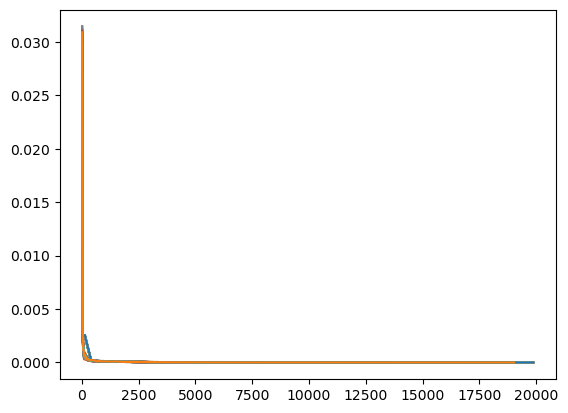

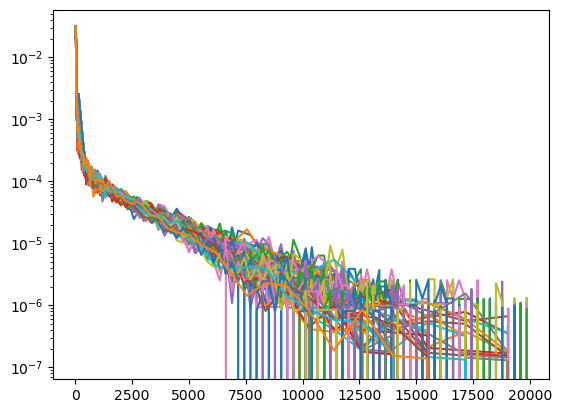

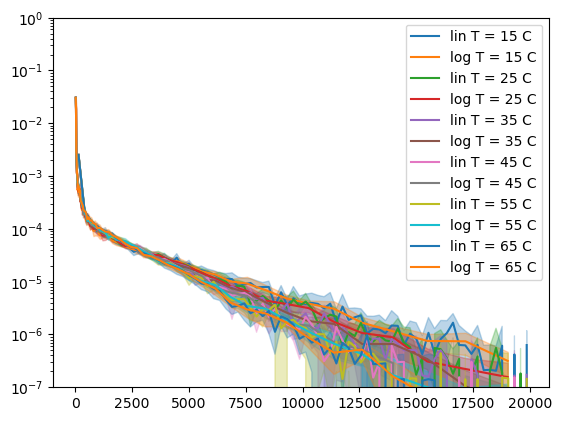

total number of reactions = 136256


In [3]:
runs = [r"./run_1/", r"./run_2/", r"./run_3/", r"./run_4/", r"./run_5/", r"./run_6/"]
Ts_C = np.arange(15, 66, 10, dtype=np.int32)
temps = [r"Temp_" + str(T) + "/" for T in Ts_C]
base_dir = r"MLMD/"

hist_res, hist_log_res = [], []
dt = []

results = []
results_err = []
tot_num_reactions = 0

for j, T_C in enumerate(Ts_C):
    posts = []
    hist = []
    hist_log = []
    num_reactions = 0
    
    for run in runs:
        posts.append(Post.Prot_Post(base_dir + r"Temp_" + str(T_C) + "/" + run, verbose=False))
    
    for i, post in enumerate(posts):
        bins, h, time_between = post.react_time(n_bins=75, bin_max=20000, lin=True, plotting=True)
        hist.append(h)
        dt.append(time_between)

        bins_log, h_log, _ = post.react_time(n_bins=75, bin_max=20000, lin=False, plotting=True)
        hist_log.append(h_log)
        
        num_reactions += np.shape(np.where(post.index_OH[1:] != post.index_OH[:-1])[0])[0]

    # make an array
    hist = np.array(hist)
    hist_ave, hist_err = Post.averages(hist)
    
    hist_log = np.array(hist_log)
    hist_log_ave, hist_log_err = Post.averages(hist_log)
    
    results.append(hist_log_ave)
    results_err.append(hist_log_err)

    # test plot
    plt.figure('test')
    plt.plot(bins, hist_ave, label=f'lin T = {T_C} C')
    color = plt.gca().lines[-1].get_color()  # Get the color of the last plotted line
    plt.fill_between(bins, hist_ave - hist_err, hist_ave + hist_err, color=color, alpha=0.3)
    
    
    plt.plot(bins_log, hist_log_ave, label=f'log T = {T_C} C')
    color = plt.gca().lines[-1].get_color()  # Get the color of the last plotted line
    plt.fill_between(bins_log, hist_log_ave - hist_log_err, hist_log_ave + hist_log_err, color=color, alpha=0.3)
    
    hist_res.append(hist_ave)
    hist_log_res.append(hist_log_ave)
    tot_num_reactions += num_reactions
    print(f'Temp {T_C}, num reaction {num_reactions}')

plt.ylim(1e-7, 1)
plt.yscale('log')
plt.xscale('linear')
plt.legend()
plt.show()

hist_res = np.array(hist_res)
hist_res = hist_res.mean(axis=0)

hist_log_res = np.array(hist_log_res)
hist_log_res = hist_log_res.mean(axis=0)

print(f"total number of reactions = {tot_num_reactions}")


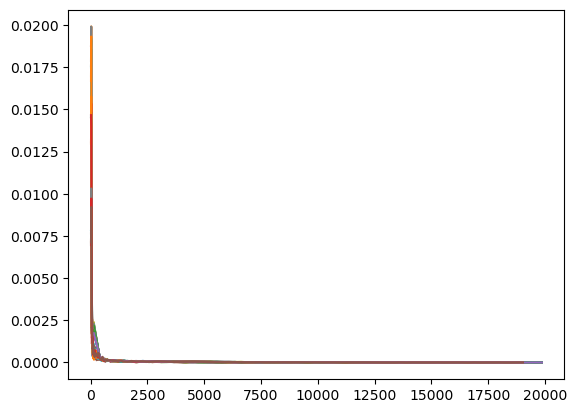

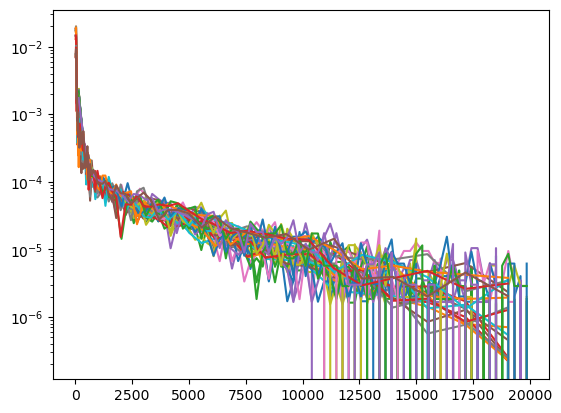

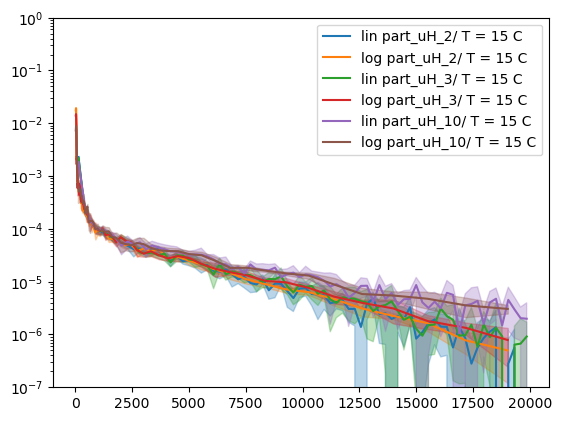

In [4]:
runs = [r"./run_1/", r"./run_2/", r"./run_3/", r"./run_4/", r"./run_5/", r"./run_6/"]
parts = [r"part_uH_2/", r"part_uH_3/", r"part_uH_10/"]	


Ts_C = np.arange(15, 16, 10, dtype=np.int32)
temps = [r"Temp_"+str(T)+"/" for T in Ts_C]
base_dir = r"MLMD_heavy/"

hist_res_heavy, hist_log_res_heavy = [], []
heavy = []

results_heavy = []
results_heavy_err = []
for part in parts:
    for j, T_C in enumerate(Ts_C):
        posts_heavy = []
        hist = []
        hist_log = []
        for run in runs:
            posts_heavy.append(Post.Prot_Post(base_dir+r"Temp_"+str(T_C)+"/"+run+part, verbose=False))
        
        for i, post in enumerate(posts_heavy):
            bins, h, time_between = post.react_time(n_bins=75, bin_max=20000, lin=True, plotting=True)
            hist.append(h)
            dt.append(time_between)

            bins_log_heavy, h_log, _ = post.react_time(n_bins=75, bin_max=20000, lin=False, plotting=True)
            hist_log.append(h_log)

        # make an array
        hist = np.array(hist)
        hist_ave, hist_err = Post.averages(hist)
        
        hist_log = np.array(hist_log)
        hist_log_ave, hist_log_err = Post.averages(hist_log)
        
        results_heavy.append(hist_log_ave)
        results_heavy_err.append(hist_log_err)

        # test plot
        plt.figure('test')
        plt.plot(bins, hist_ave, label=f'lin {part} T = {T_C} C')
        color = plt.gca().lines[-1].get_color()  # Get the color of the last plotted line
        plt.fill_between(bins, hist_ave - hist_err, hist_ave + hist_err, color=color, alpha=0.3)
        
        
        plt.plot(bins_log, hist_log_ave, label=f'log {part} T = {T_C} C')
        color = plt.gca().lines[-1].get_color()  # Get the color of the last plotted line
        plt.fill_between(bins_log, hist_log_ave - hist_log_err, hist_log_ave + hist_log_err, color=color, alpha=0.3)
        
        hist_res_heavy.append(hist_ave)
        hist_log_res_heavy.append(hist_log_ave)

plt.ylim(1e-7, 1)
plt.yscale('log')
plt.xscale('linear')
plt.legend()
plt.show()

hist_res_heavy = np.array(hist_res_heavy)
hist_res_heavy = hist_res_heavy.mean(axis=0)

hist_log_res_heavy = np.array(hist_log_res_heavy)
hist_log_res_heavy = hist_log_res_heavy.mean(axis=0)

In [5]:
# dt = np.concatenate(dt)
# bin_edges = np.arange(0, 4000, step=100, dtype=np.float64)
# hist, _ = np.histogram(dt, bins=bin_edges, density=True)
# range = (bin_edges[1:] + bin_edges[:-1])/2

In [6]:
# bin_edges2 = np.logspace(np.log10(1), np.log10(4000), num=50)
# bin_edges2 = np.unique(np.ceil(bin_edges2).astype(int))

# hist2, _ = np.histogram(dt, bins=bin_edges2, density=False)

# hist2 = hist2/(bin_edges2[1:] - bin_edges2[:-1])
# hist2 = hist2/dt.shape[0]

# range2 = (bin_edges2[1:] + bin_edges2[:-1])/2

### LOAD MLMD INFORMATION

In [7]:
def exp_dist(dt, lam, a):
    return a*lam*np.exp(-lam*dt)


In [8]:
# plt.figure()
# popt, _ = opt.curve_fit(exp_dist, bins_filt, hist_filt, p0=(1e-3, 1))
# fit_res = exp_dist(t, popt[0], popt[1])
# plt.plot(t, fit_res, label=f'lamda = {popt[0]:.3e}, a = {popt[1]:.3f}')
# plt.plot(bins, hist_res)
# plt.plot(bins_log, hist_log_res)

# plt.yscale('log')
# plt.xscale('linear')
# plt.legend()
# # plt.grid()
# plt.xlim(0, 4000)
# plt.ylim(1e-7, 1)

# plt.tight_layout()
# # plt.close()

In [9]:
# start = 35
# stop = -1

# fig, axs = plt.subplots(figsize=(6, 4))

# # CMD
# # tip4p_handle, = axs.plot(mixture.rdf_results['r/[Angstrom]'], mixture.rdf_results['g(r) watOh'], label=r'TIP4P+DFF/\ce{OH-}$^\text{4}$', color='C3')
# for i, result in reversed(list(enumerate(results))):
#     result_err = results_err[i]
#     if i == 0:
#         color = 'C0'
#         data = Post.line_with_errors(result, results_err[i])
#         T15_handle, = axs.plot(bins_log*1e-3, data[0], color=color)
#         axs.fill_between(bins_log*1e-3, data[1], data[2], alpha=0.25, color=color)
        
#         color='C1'
#         hist_filt = result[start:stop]
#         hist_err_filt = result_err[start:stop]
#         bins_filt = bins_log[start:stop]
#         t = np.linspace(bins_filt[0], bins_filt[-1], 4000)

#         popt, pcov = opt.curve_fit(exp_dist, bins_filt, hist_filt,
#                                    sigma=hist_err_filt, absolute_sigma=True, p0=(1e-3, 1))
#         fit_res = Post.expt_dit(t, popt[0], popt[1])
#         fit_handle, = axs.plot(t*1e-3, fit_res, color=color, linestyle='dashed')
        
#         # Calculate the 2-sigma confidence interval
#         perr = np.sqrt(np.diag(pcov))  # Standard deviations of the parameters
#         sigma = 2
#         upper_bound = Post.expt_dit(t, *(popt + sigma * perr))
#         lower_bound = exp_dist(t, *(popt - sigma * perr))
#         axs.fill_between(t * 1e-3, lower_bound, upper_bound, color=color, alpha=0.25)

#     elif i == 1:
#         color='grey'
#         data = Post.line_with_errors(result, results_err[i])
#         Tother_handle, = axs.plot(bins_log*1e-3, data[0], color=color, alpha=0.5)
#         axs.fill_between(bins_log*1e-3, data[1], data[2], color=color, alpha=0.15)

#     else:
#         color = 'grey'
#         data = Post.line_with_errors(result, results_err[i])
#         axs.plot(bins_log*1e-3, data[0], color=color, alpha=0.5)
#         axs.fill_between(bins_log*1e-3, data[1], data[2], color=color, alpha=0.15)

# # Combining legends from both axes in the desired order
# handles = [T15_handle, fit_handle, Tother_handle]
# labels = [r'$T = \SI{15}{\degreeCelsius}$', r'fit $a \lambda e^{-\lambda \Delta t}$',  r'Other $T$']

# # Creating the legend
# axs.legend(handles, labels, loc='best')

# axs.set_xlim(0, 19000*1e-3)
# axs.set_xlabel(r'a') # $\Delta t_\text{reaction}/[\si{\ps}]$
# axs.set_ylim(1e-6, 1)
# axs.set_ylabel(r'Probability for time between reactions')

# # Adjust layout to prevent overlap
# plt.yscale('log')
# plt.xscale('linear')
# axs.legend(handles, labels, loc='upper left')
# plt.tight_layout()

# # Saving the figure
# plt.savefig('poster_NONE')
# plt.close()

In [10]:
# # Assuming exp_dist is defined somewhere in the code

# start = 35
# stop = -1

# fig, axs = plt.subplots(figsize=(6, 4))

# for i, result in reversed(list(enumerate(results))):
#     result_err = results_err[i]
#     if i == 0:
#         color = 'C0'
#         data = Post.line_with_errors(result, results_err[i])
#         T15_handle, = axs.plot(bins_log * 1e-3, data[0], color=color)
#         axs.fill_between(bins_log * 1e-3, data[1], data[2], alpha=0.25, color=color)
        
#         color = 'C1'
#         hist_filt = result[start:stop]
#         hist_err_filt = result_err[start:stop]
#         bins_filt = bins_log[start:stop]
#         t = np.linspace(bins_filt[0], bins_filt[-1], 4000)

#         popt, pcov = opt.curve_fit(exp_dist, bins_filt, hist_filt,
#                                    sigma=hist_err_filt, absolute_sigma=True, p0=(1e-3, 1))
#         fit_res = exp_dist(t, popt[0], popt[1])
#         fit_handle, = axs.plot(t * 1e-3, fit_res, color=color, linestyle='dashed')
        
#         # Calculate the 2-sigma confidence interval
#         perr = np.sqrt(np.diag(pcov))  # Standard deviations of the parameters
#         sigma = 2
#         upper_bound = exp_dist(t, *(popt + sigma * perr))
#         lower_bound = exp_dist(t, *(popt - sigma * perr))
#         axs.fill_between(t * 1e-3, lower_bound, upper_bound, color=color, alpha=0.25)

#     elif i == 1:
#         color = 'grey'
#         data = Post.line_with_errors(result, results_err[i])
#         Tother_handle, = axs.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
#         axs.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

#     else:
#         color = 'grey'
#         data = Post.line_with_errors(result, results_err[i])
#         axs.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
#         axs.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

# axs.text(0.02, 0.02, 'Long times between reactions\nare driven by the reconfiguration of\n atoms from the nonreactive to the\nreactive hydration mode. This scales with\n$a \lambda e^{-\lambda \Delta t}$. Indicated is $a= 0.29$ and $\lambda=0.35\si{\per\ps}$', fontsize=10, ha='left', va='bottom', transform=axs.transAxes)


# # Combining legends from both axes in the desired order
# handles = [T15_handle, fit_handle, Tother_handle]
# labels = [r'$T = \SI{15}{\degreeCelsius}$', r'fit $a \lambda e^{-\lambda \Delta t}$', r'Other $T$']

# # Creating the legend
# axs.legend(handles, labels, loc='best')

# axs.set_xlim(1 * 1e-3, 19000 * 1e-3)
# axs.set_xlabel(r'Time between reactions $\Delta t_\text{reaction}/[\si{\pico\s}]$')
# axs.set_ylim(1e-7, 1e-1)
# axs.set_ylabel(r'Probability for time between reactions')

# plt.yscale('log')
# plt.xscale('linear')
# plt.tight_layout()

# # Create inset axes
# ax_inset = inset_axes(axs, width='45%', height='45%', loc='upper right',
#                       borderpad=1)  # Inset size and location

# # Plot the same data in the inset
# for i, result in reversed(list(enumerate(results))):
#     result_err = results_err[i]
#     if i == 0:
#         color = 'C0'
#         data = Post.line_with_errors(result, results_err[i])
#         ax_inset.plot(bins_log * 1e-3, data[0], color=color)
#         ax_inset.fill_between(bins_log * 1e-3, data[1], data[2], alpha=0.25, color=color)
        
#         color = 'C1'
#         hist_filt = result[start:stop]
#         hist_err_filt = result_err[start:stop]
#         bins_filt = bins_log[start:stop]
#         t = np.linspace(bins_filt[0], bins_filt[-1], 4000)

#     elif i == 1:
#         color = 'grey'
#         data = Post.line_with_errors(result, results_err[i])
#         ax_inset.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
#         ax_inset.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

#     else:
#         color = 'grey'
#         data = Post.line_with_errors(result, results_err[i])
#         ax_inset.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
#         ax_inset.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

# ax_inset.text(1.02, 0.97, 'Most reactions occur in short\ntimescales. This is within\nthe same reactive hydration\nmode as the last reaction.', fontsize=10, ha='right', va='top', transform=ax_inset.transAxes)

# # Set limits for the inset
# ax_inset.set_xlim(0, 0.25)
# ax_inset.set_ylim(1e-4, 1e-1)
# ax_inset.set_xlabel(r'$\Delta t_\text{reaction}/[\si{\pico\s}]$', fontsize=10, labelpad=2)
# ax_inset.set_ylabel(r'Probability', fontsize=10, labelpad=5)

# # Adjust tick parameters for font size
# ax_inset.tick_params(axis='both', which='major', labelsize=10, pad=2)

# # Adjust layout to prevent overlap
# plt.yscale('log')
# plt.xscale('linear')
# axs.legend(handles, labels, loc='upper left')
# plt.tight_layout()

# # Saving the figure
# plt.savefig('poster_rate')
# plt.close()


In [11]:
# print(popt[0]*1000, 2*np.sqrt(pcov[0, 0]*1000))
# print(popt[1], 2*np.sqrt(pcov[1, 1]))

Now with the full paper figure.

<>:74: SyntaxWarning: invalid escape sequence '\l'
<>:74: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2469567/4066989207.py:74: SyntaxWarning: invalid escape sequence '\l'
  ax_main.text(0.02, 0.02, 'Long times between reactions\nare driven by the reconfiguration of\n atoms from the nonreactive to the\nreactive hydration mode. This scales with\n$a \lambda e^{-\lambda \Delta t}$. Indicated is $a= 0.29$ and test4', fontsize=10, ha='left', va='bottom', transform=ax_main.transAxes)



T = result 15
tao =  3.206654384685492  +/-  0.2843174718959332
a =  0.2895309086854126  +/-  0.02729699738455701


/tmp/ipykernel_2469567/4066989207.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


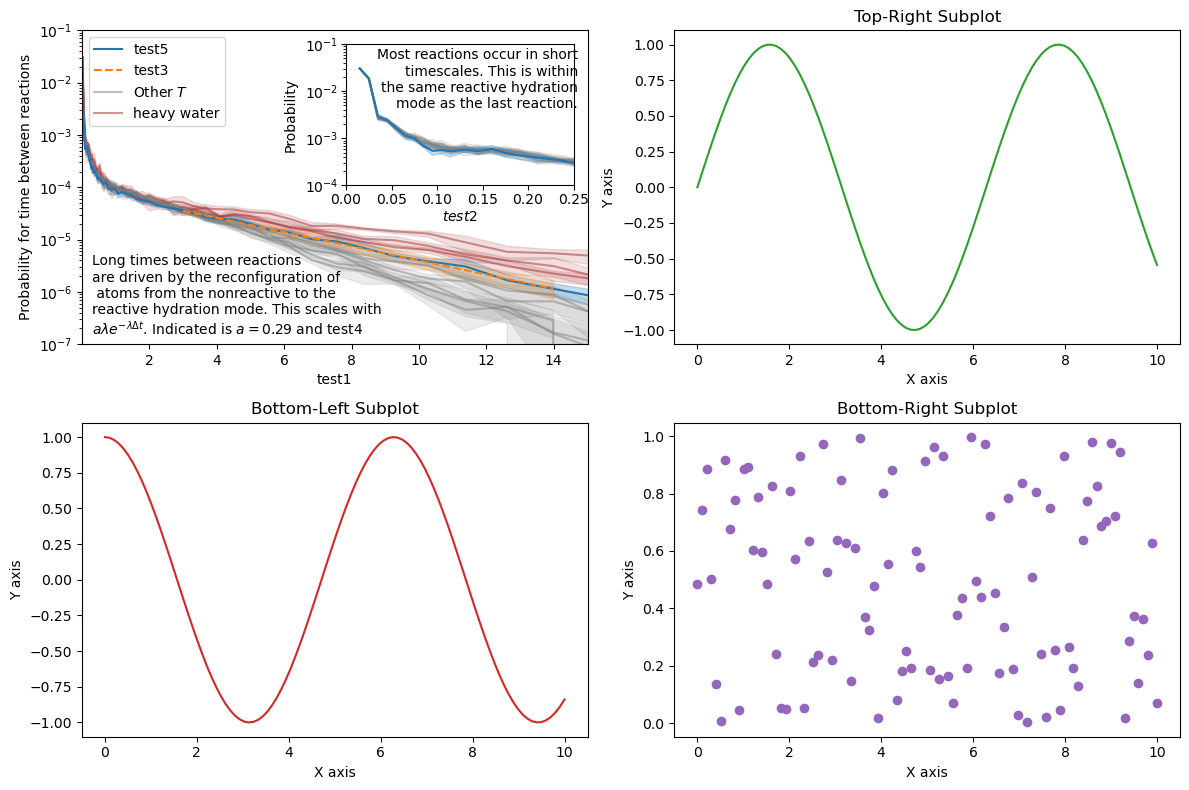

In [12]:
start = 42
stop = 58

# Create a 2x2 grid of subfigures
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of subfigures
ax_main = axs[0, 0]  # Top-left subfigure

for i, result_heavy in reversed(list(enumerate(results_heavy))):
    result_heavy_err = results_heavy_err[i]
    if i == 0:
        # HEAVY WATER
        color = 'brown'
        data = Post.line_with_errors(result_heavy, results_heavy_err[i])
        heavy_handle, = ax_main.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
        ax_main.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)
    else:
        color = 'brown'
        data = Post.line_with_errors(result_heavy, results_heavy_err[i])
        ax_main.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
        ax_main.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

#test1= Time between reactions $\Delta t_\text{reaction}/[\si{\pico\s}]$
#test2=\Delta t_\text{reaction}/[\si{\pico\s}]
#test3= fit $a \lambda e^{-\lambda \Delta t}$
#test4= $\lambda=0.35\si{\per\ps}$
#test5= $T = \SI{15}{\degreeCelsius}$
# Plot in the top-left subfigure (ax_main)
for i, result in reversed(list(enumerate(results))):
    result_err = results_err[i]
    if i == 0:
        # NORMAL WATER
        color = 'C0'
        data = Post.line_with_errors(result, results_err[i])
        T15_handle, = ax_main.plot(bins_log * 1e-3, data[0], color=color)
        ax_main.fill_between(bins_log * 1e-3, data[1], data[2], alpha=0.25, color=color)
        
        color = 'C1'
        hist_filt = result[start:stop]
        hist_err_filt = result_err[start:stop]
        bins_filt = bins_log[start:stop]
        t = np.linspace(bins_filt[0], bins_filt[-1], 100)

        popt, pcov = opt.curve_fit(Post.exp_dist, bins_filt, hist_filt,
                                   sigma=hist_err_filt, absolute_sigma=True, p0=(1000, 1))
        fit_res = Post.exp_dist(t, popt[0], popt[1])
        fit_handle, = ax_main.plot(t * 1e-3, fit_res, color=color, linestyle='dashed')
        
        # Calculate the 2-sigma confidence interval
        perr = np.sqrt(np.diag(pcov))  # Standard deviations of the parameters
        sigma = 2
        upper_bound = Post.exp_dist(t, *(popt + sigma * perr))
        lower_bound = Post.exp_dist(t, *(popt - sigma * perr))
        ax_main.fill_between(t * 1e-3, lower_bound, upper_bound, color=color, alpha=0.25)
        
        print("")
        print("T = result", Ts_C[i])
        print("tao = ", popt[0]/1000, " +/- ", sigma*perr[0]/1000)
        print("a = ", popt[1], " +/- ", sigma*perr[1])
        
    elif i == 1:
        color = 'grey'
        data = Post.line_with_errors(result, results_err[i])
        Tother_handle, = ax_main.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
        ax_main.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

    else:
        color = 'grey'
        data = Post.line_with_errors(result, results_err[i])
        ax_main.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
        ax_main.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

        

ax_main.text(0.02, 0.02, 'Long times between reactions\nare driven by the reconfiguration of\n atoms from the nonreactive to the\nreactive hydration mode. This scales with\n$a \lambda e^{-\lambda \Delta t}$. Indicated is $a= 0.29$ and test4', fontsize=10, ha='left', va='bottom', transform=ax_main.transAxes)  

# Combining legends from both axes in the desired order
handles = [T15_handle, fit_handle, Tother_handle, heavy_handle]
labels = [r'test5', r'test3', r'Other $T$', r'heavy water']

# Creating the legend
ax_main.legend(handles, labels, loc='upper left')

ax_main.set_xlim(1 * 1e-3, 15000 * 1e-3)
ax_main.set_xlabel(r'test1')  
ax_main.set_ylim(1e-7, 1e-1)
ax_main.set_ylabel(r'Probability for time between reactions')

ax_main.set_yscale('log')
ax_main.set_xscale('linear')

# Create inset axes within the top-right subfigure
ax_inset = inset_axes(ax_main, width='45%', height='45%', loc='upper right', borderpad=1)  # Inset size and location

# Plot the same data in the inset
for i, result in reversed(list(enumerate(results))):
    result_err = results_err[i]
    if i == 0:
        color = 'C0'
        data = Post.line_with_errors(result, results_err[i])
        ax_inset.plot(bins_log * 1e-3, data[0], color=color)
        ax_inset.fill_between(bins_log * 1e-3, data[1], data[2], alpha=0.25, color=color)

    elif i == 1:
        color = 'grey'
        data = Post.line_with_errors(result, results_err[i])
        ax_inset.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
        ax_inset.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

    else:
        color = 'grey'
        data = Post.line_with_errors(result, results_err[i])
        ax_inset.plot(bins_log * 1e-3, data[0], color=color, alpha=0.5)
        ax_inset.fill_between(bins_log * 1e-3, data[1], data[2], color=color, alpha=0.15)

ax_inset.text(1.02, 0.97, 'Most reactions occur in short\ntimescales. This is within\nthe same reactive hydration\nmode as the last reaction.', fontsize=10, ha='right', va='top', transform=ax_inset.transAxes)

# Set limits for the inset
ax_inset.set_xlim(0, 0.25)
ax_inset.set_ylim(1e-4, 1e-1)
ax_inset.set_xlabel(r'$test2$', fontsize=10, labelpad=2)  
ax_inset.set_ylabel('Probability', fontsize=10, labelpad=5)

# Adjust tick parameters for font size
ax_inset.tick_params(axis='both', which='major', labelsize=10, pad=2)
# Adjust layout to prevent overlap
plt.yscale('log')
plt.xscale('linear')

# Plot dummy data in the other three subfigures
# Dummy data for the top-right subfigure
x_dummy = np.linspace(0, 10, 100)
y_dummy = np.sin(x_dummy)
axs[0, 1].plot(x_dummy, y_dummy, color='C2')
axs[0, 1].set_title("Top-Right Subplot")
axs[0, 1].set_xlabel("X axis")
axs[0, 1].set_ylabel("Y axis")

# Dummy data for the bottom-left subfigure
y_dummy2 = np.cos(x_dummy)
axs[1, 0].plot(x_dummy, y_dummy2, color='C3')
axs[1, 0].set_title("Bottom-Left Subplot")
axs[1, 0].set_xlabel("X axis")
axs[1, 0].set_ylabel("Y axis")

# Dummy data for the bottom-right subfigure
y_dummy3 = np.random.random(100)
axs[1, 1].scatter(x_dummy, y_dummy3, color='C4')
axs[1, 1].set_title("Bottom-Right Subplot")
axs[1, 1].set_xlabel("X axis")
axs[1, 1].set_ylabel("Y axis")

plt.tight_layout()

# Saving the figure
plt.show()

In [13]:
for i, result in enumerate(results):
    result_err = results_err[i]
    np.savetxt(f'plot2/1a{i}_data.txt',
               np.column_stack((bins_log * 1e-3, result, result-result_err, result+result_err)),
               delimiter=' ',
               header="X Y Ymin Ymax",
               comments="")

np.savetxt(f'plot2/1a6_data.txt',
           np.column_stack((t * 1e-3, fit_res, lower_bound, upper_bound)),
           delimiter=' ',
           header="X Y Ymin Ymax",
           comments="")

for i, result_heavy in enumerate(results_heavy):
    result_heavy_err = results_heavy_err[i]
    np.savetxt(f'plot2/1a{i+7}_data.txt',
               np.column_stack((bins_log * 1e-3, result_heavy, result_heavy-result_heavy_err, result_heavy+result_heavy_err)),
               delimiter=' ',
               header="X Y Ymin Ymax",
               comments="")

### Now the hbonding analysis

In [14]:
runs = [r"./run_1/", r"./run_2/", r"./run_3/", r"./run_4/", r"./run_5/", r"./run_6/"]
T = 15
folders = [r"Temp_"+str(T)+"/"]
base_dir = r"MLMD/"
posts=[]

for run in runs:
    posts.append(Post.Prot_Post(base_dir+folders[0]+run))

no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path


Hydrogen bond type rO<2.9
+--------+------------------+--------------------+------------------+
| Type   | Donor            | Acceptor           | Sum              |
+========+==================+====================+==================+
| Total  | 3.4280 +- 0.0085 | 0.0000 +- 0.000000 | 3.4280 +- 0.0085 |
+--------+------------------+--------------------+------------------+
| Rest   | 3.4445 +- 0.0084 | 0.0000 +- 0.0000   | 3.4445 +- 0.0084 |
+--------+------------------+--------------------+------------------+
| Before | 2.7914 +- 0.0118 | 0.0000 +- 0.0000   | 2.7914 +- 0.0118 |
+--------+------------------+--------------------+------------------+
| After  | 2.8468 +- 0.0070 | 0.0000 +- 0.0000   | 2.8468 +- 0.0070 |
+--------+------------------+--------------------+------------------+

Hydrogen bond type rO<3.5, beta<30deg
+--------+------------------+--------------------+------------------+
| Type   | Donor            | Acceptor           | Sum              |
+========+===============

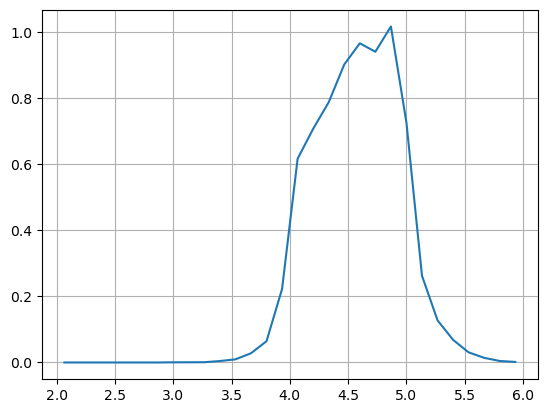

In [15]:
# Check als de range lang word of we dan weer het gemiddelde krijgen DONE
# Donor/acceptor splitsen DONE
# kansverdeling van integer waterstofbruggen OH- shifted moving average
# Reaction rate voor een te grote dichtheid zou minder reacties moeten geven.
hbs_types_text = ["rO<2.9", "rO<3.5, beta<30deg", "rO < 3.3-value*beta^2", "r_O < 3.2, thata>140deg", "rHO < 2.27, theta>140deg"]

bin = 30 # Number of bins for the histogram
width = 200 # Width of the filter

incl = 2 # Number of steps to include in the moving average *5 for fs windows

for hbs_type, hbs_type_text in enumerate(hbs_types_text):
    total = np.zeros((len(posts), 2), dtype=float)
    rest = np.zeros_like(total)
    before = np.zeros_like(total)
    after = np.zeros_like(total)

    hists_a = np.zeros((bin, 4, 2))
    for i, post in enumerate(posts):
        before_m, after_m, rest_m, hist, bins = post.hbonding_analysis(stepincl=incl, filter_width=width, bins=bin)
        hists_a += hist/len(posts)
        
        overal_ave = np.mean(post.current_hbs[:, hbs_type, :], axis=0)
        
        total[i, :] = overal_ave
        rest[i, :] = rest_m[hbs_type, :]
        before[i, :] = before_m[hbs_type, :]
        after[i, :] = after_m[hbs_type, :]

    total_m, total_e = Post.averages(total)
    rest_m, rest_e = Post.averages(rest)
    before_m, before_e = Post.averages(before)
    after_m, after_e = Post.averages(after)
    # Prepare data for tabulation
    headers = ["Type", "Donor", "Acceptor", "Sum"]
    data = [
        ["Total", f"{total_m[0]:.4f} +- {total_e[0]:.4f}", f"{total_m[1]:.4f} +- {total_e[1]:4f}", f"{np.sum(total_m):.4f} +- {np.sum(total_e):.4f}"],
        ["Rest", f"{rest_m[0]:.4f} +- {rest_e[0]:.4f}", f"{rest_m[1]:.4f} +- {rest_e[1]:.4f}", f"{np.sum(rest_m):.4f} +- {np.sum(rest_e):.4f}"],
        ["Before", f"{before_m[0]:.4f} +- {before_e[0]:.4f}", f"{before_m[1]:.4f} +- {before_e[1]:.4f}", f"{np.sum(before_m):.4f} +- {np.sum(before_e):.4f}"],
        ["After", f"{after_m[0]:.4f} +- {after_e[0]:.4f}", f"{after_m[1]:.4f} +- {after_e[1]:.4f}", f"{np.sum(after_m):.4f} +- {np.sum(after_e):.4f}"]
    ]

    # Print results using tabulate
    print(f"Hydrogen bond type {hbs_type_text}")
    print(tabulate(data, headers=headers, tablefmt="grid"))
    print()
    
    if hbs_type == 3:
        data = np.array([[4, before_m[0], before_e[0], before_m[1], before_e[1], np.sum(before_m), np.sum(before_e)],
                         [3, after_m[0], after_e[0], after_m[1], after_e[1], np.sum(after_m), np.sum(after_e)],
                         [2, rest_m[0], rest_e[0], rest_m[1], rest_e[1], np.sum(rest_m), np.sum(rest_e)],
                         [1, total_m[0], total_e[0], total_m[1], total_e[1], np.sum(total_m), np.sum(total_e)]])
        np.savetxt(f'plot2/1b_data.txt',
                   data, delimiter=' ', fmt='%.9f',
                   header="Title Donor_m Donor_e Acceptor_m Acceptor_e sum_m sum_e",
                   comments="")
    
plt.plot(bins[:, 1], hists_a[:, 0, 1])
plt.grid()